In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob


df = pd.read_csv('Merged_data.csv')


df_images = df[df['image_url'].notnull()].copy()
df_no_images = df[df['image_url'].isnull()].copy()

def generate_features(dataframe):

    dataframe['title_length'] = dataframe['title'].str.len()


    dataframe['body_length'] = dataframe['body_text'].str.len().fillna(0)


    dataframe['total_word_count'] = (dataframe['title'].str.split().str.len().fillna(0) +
                                   dataframe['body_text'].str.split().str.len().fillna(0))


    dataframe['sentiment'] = dataframe['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    return dataframe


df_images = generate_features(df_images)
df_no_images = generate_features(df_no_images)


df_images.to_csv('data_with_images.csv', index=False)
df_no_images.to_csv('data_without_images.csv', index=False)

print("Files created: data_with_images.csv and data_without_images.csv")

Files created: data_with_images.csv and data_without_images.csv


In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from PIL import Image
import requests
from io import BytesIO
import numpy as np


clip_model = SentenceTransformer('clip-ViT-B-32')

def get_clip_embeddings(urls):
    embeddings = []
    for url in urls:
        try:
            response = requests.get(url, timeout=5)
            img = Image.open(BytesIO(response.content)).convert('RGB')
            embedding = clip_model.encode(img)
            embeddings.append(embedding)
        except:

            embeddings.append(np.zeros(512))
    return np.array(embeddings)

print("Generating CLIP embeddings for images... this may take a while.")
image_urls = df_images['image_url'].tolist()
clip_embeddings = get_clip_embeddings(image_urls)




column_names = [f'clip_{i}' for i in range(clip_embeddings.shape[1])]


df_clip = pd.DataFrame(clip_embeddings, columns=column_names)


df_clip.to_csv('clip_embeddings.csv', index=False)



print("CLIP embeddings saved as clip_embeddings.csv")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Generating CLIP embeddings for images... this may take a while.


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (174662656 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (121484484 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (117331669 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


CLIP embeddings saved as clip_embeddings.csv



--- Processing No-Image Subset ---
Generating text embeddings...


Batches:   0%|          | 0/98 [00:00<?, ?it/s]

Batches:   0%|          | 0/98 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195024
[LightGBM] [Info] Number of data points in the train set: 2497, number of used features: 809
[LightGBM] [Info] Start training from score 9.741034


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Results for Score:
R2 Score: 0.7516 (Goal: >0.9 for Score, >0.4 for Comments)
MAE: 11783.4998


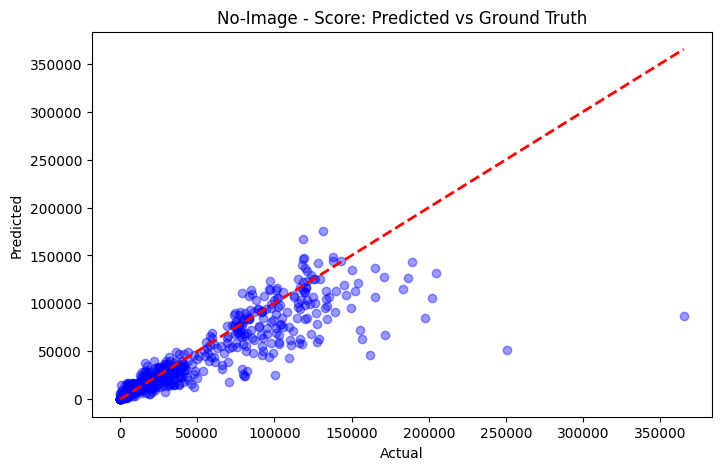

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195024
[LightGBM] [Info] Number of data points in the train set: 2497, number of used features: 809
[LightGBM] [Info] Start training from score 6.766474


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Results for Num_Comments:
R2 Score: 0.3794 (Goal: >0.9 for Score, >0.4 for Comments)
MAE: 1285.7589


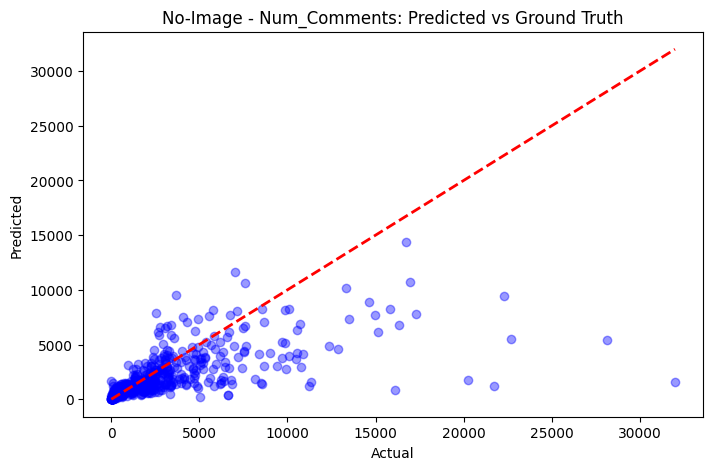


--- Processing With-Image Subset ---
Generating text embeddings...


Batches:   0%|          | 0/66 [00:00<?, ?it/s]

Batches:   0%|          | 0/66 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 263895
[LightGBM] [Info] Number of data points in the train set: 1680, number of used features: 1309
[LightGBM] [Info] Start training from score 9.667846


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Results for Score:
R2 Score: 0.9201 (Goal: >0.9 for Score, >0.4 for Comments)
MAE: 8751.9899


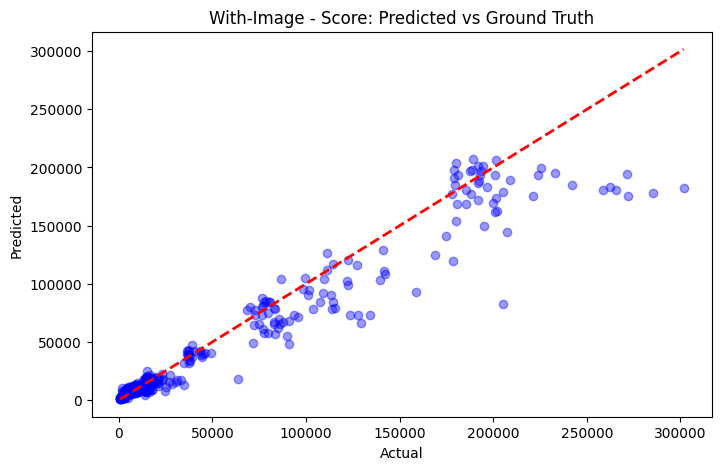

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 263895
[LightGBM] [Info] Number of data points in the train set: 1680, number of used features: 1309
[LightGBM] [Info] Start training from score 6.164488


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Results for Num_Comments:
R2 Score: 0.3796 (Goal: >0.9 for Score, >0.4 for Comments)
MAE: 703.0844


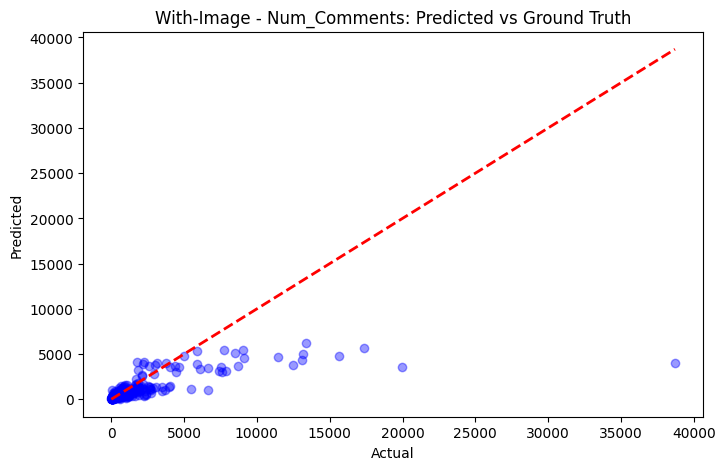

In [ ]:
import pandas as pd
import numpy as np
import matenceTratplotlib.pyplot as plt
from sentence_transformers import Sennsformer
from sklearn.ensemble import VotingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


text_model = SentenceTransformer('all-MiniLM-L6-v2')

def prepare_and_train(df, clip_embs=None, subset_name=""):
    print(f"\n--- Processing {subset_name} Subset ---")


    print("Generating text embeddings...")
    title_embs = text_model.encode(df['title'].tolist(), show_progress_bar=True)
    body_embs = text_model.encode(df['body_text'].fillna('').tolist(), show_progress_bar=True)


    subreddit_dummies = pd.get_dummies(df['subreddit'], prefix='sub').values


    stats = df[['title_length', 'body_length', 'total_word_count', 'sentiment']].values


    stack_list = [title_embs, body_embs, subreddit_dummies, stats]
    if clip_embs is not None:
        stack_list.append(clip_embs)

    X = np.hstack(stack_list)


    y_score = df['score'].values
    y_comments = df['num_comments'].values


    def build_model():
        lgb = LGBMRegressor(n_estimators=1000, learning_rate=0.03, num_leaves=31)
        hgb = HistGradientBoostingRegressor(max_iter=1000, learning_rate=0.03, max_depth=12)
        xgb = XGBRegressor(n_estimators=800, learning_rate=0.1)

        ensemble = VotingRegressor(estimators=[('lgb', lgb), ('hgb', hgb), ('xgb', xgb)])


        return TransformedTargetRegressor(
            regressor=ensemble,
            func=np.log1p,
            inverse_func=np.expm1
        )


    for target_name, y in [("Score", y_score), ("Num_Comments", y_comments)]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = build_model()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)


        r2 = r2_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        print(f"\nResults for {target_name}:")
        print(f"R2 Score: {r2:.4f} (Goal: >0.9 for Score, >0.4 for Comments)")
        print(f"MAE: {mae:.4f}")


        plt.figure(figsize=(8, 5))
        plt.scatter(y_test, preds, alpha=0.4, color='blue')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.title(f"{subset_name} - {target_name}: Predicted vs Ground Truth")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.show()




df_no_images = pd.read_csv('data_without_images.csv')
prepare_and_train(df_no_images, subset_name="No-Image")


df_images = pd.read_csv('data_with_images.csv')
clip_df = pd.read_csv('clip_embeddings.csv')
prepare_and_train(df_images, clip_embs=clip_df.values, subset_name="With-Image")